<a href="https://colab.research.google.com/github/arman-aminian/dogs-classification/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset in Google Drive and unzip it!

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# cd drive

/content/drive


In [ ]:
# cd MyDrive/

/content/drive/MyDrive


In [ ]:
# !mkdir project3

In [ ]:
# cd project3/

/content/drive/My Drive/project3


In [ ]:
# !wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2020-12-04 00:32:51--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  65.0MB/s    in 13s     

2020-12-04 00:33:05 (57.4 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [ ]:
# ls

images.tar


In [ ]:
# !tar -xvf  'images.tar'

# Importing libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from tensorflow import keras
import math

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras import layers
from tensorflow.python.keras.engine import training
from tensorflow.python.keras import backend
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Data loading and preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pwd

'/content'

In [ ]:
cd ./drive/MyDrive/project3

/content/drive/MyDrive/project3


In [ ]:
ls

Images/  images.tar


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [ ]:
DATA_SET_DIR = "./Images"
IMAGE_SIZE = 224
BATCH_SIZE = 128
TRAIN_SIZE = int(20580*0.8)
TEST_SIZE = int(20580*0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(DATA_SET_DIR,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = test_datagen.flow_from_directory(DATA_SET_DIR,
                                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


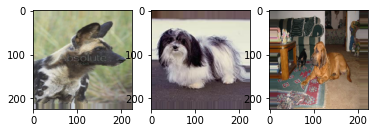

In [ ]:
def show_images(images, row):
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(row, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)

show_images(train_generator[16][0][:3], 1)

# Custom CNN Network : 13% Accuracy

In [ ]:
KERNEL_SIZE = 3

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', input_shape=[IMAGE_SIZE,IMAGE_SIZE,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

# cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dense(units=120, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam')



In [ ]:
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               23888128  
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)             

In [ ]:
total_epoch = 10
lr_init = 0.0001

In [ ]:
cnn.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=total_epoch
)

Epoch 1/10
129/129 [==============================] - 2926s 23s/step - loss: 4.8772 - val_loss: 4.7446
Epoch 2/10
129/129 [==============================] - 241s 2s/step - loss: 4.5998 - val_loss: 4.5103
Epoch 3/10
129/129 [==============================] - 237s 2s/step - loss: 4.4228 - val_loss: 5.7723
Epoch 4/10
129/129 [==============================] - 230s 2s/step - loss: 4.3292 - val_loss: 4.2806
Epoch 5/10
129/129 [==============================] - 229s 2s/step - loss: 4.2110 - val_loss: 4.2649
Epoch 6/10
129/129 [==============================] - 227s 2s/step - loss: 4.1115 - val_loss: 4.2714
Epoch 7/10
129/129 [==============================] - 226s 2s/step - loss: 4.0435 - val_loss: 4.1033
Epoch 8/10
129/129 [==============================] - 226s 2s/step - loss: 3.9590 - val_loss: 4.0836
Epoch 9/10
129/129 [==============================] - 229s 2s/step - loss: 3.8795 - val_loss: 4.0263
Epoch 10/10
129/129 [==============================] - 236s 2s/step - loss: 3.7988 - val_

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
129/129 [==============================] - 235s 2s/step - loss: 3.7064 - accuracy: 0.1460 - val_loss: 3.8934 - val_accuracy: 0.1142
Epoch 2/10
129/129 [==============================] - 227s 2s/step - loss: 3.6421 - accuracy: 0.1559 - val_loss: 3.8893 - val_accuracy: 0.1137
Epoch 3/10
129/129 [==============================] - 233s 2s/step - loss: 3.5685 - accuracy: 0.1640 - val_loss: 3.8955 - val_accuracy: 0.1252
Epoch 4/10
129/129 [==============================] - 237s 2s/step - loss: 3.5124 - accuracy: 0.1768 - val_loss: 3.8701 - val_accuracy: 0.1245
Epoch 5/10
129/129 [==============================] - 241s 2s/step - loss: 3.4457 - accuracy: 0.1851 - val_loss: 3.8706 - val_accuracy: 0.1284
Epoch 6/10
129/129 [==============================] - 239s 2s/step - loss: 3.3820 - accuracy: 0.1958 - val_loss: 3.8747 - val_accuracy: 0.1225
Epoch 7/10
129/129 [==============================] - 236s 2s/step - loss: 3.3283 - accuracy: 0.2071 - val_loss: 3.8913 - val_accuracy: 0.1191

[0.0001, 0.00014715177646857695, 0.00030122571620038027, 0.00043307290635716066, 0.0005130312413993676, 0.0005377003383729307, 0.0005178851256927623, 0.00046888035555159497, 0.00040492292381893205, 0.00033689734995427336, 0.00027197463922978366, 0.00021416418806397342, 0.00016515279534858634, 0.00012511020567407963, 9.333298746244693e-05, 6.870274619443443e-05, 4.998200484746474e-05, 3.5986298871675764e-05, 2.567043505998692e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05, 1.815997190499394e-05]


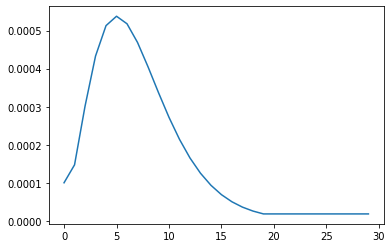

In [ ]:
def scheduler(epoch):
    epoch += 1
   
    if epoch == 1:
        return lr_init
    
    elif epoch >= 2 and epoch <= 20:
        return (0.5*epoch**3)*math.exp(-0.5*epoch)*lr_init
    
    else:
        return scheduler_2(20-1)
    

stage = [i for i in range(0,30)]
learning_rate = [scheduler(x) for x in stage]
plt.plot(stage, learning_rate)
print(learning_rate)

# Custom CNN Network2 : too bad Accuracy :)

In [ ]:
BATCH_SIZE_VGG = 32
EPOCHS_VGG = 100

In [ ]:
train_generator_vgg = train_datagen.flow_from_directory(DATA_SET_DIR,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE_VGG,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator_vgg = test_datagen.flow_from_directory(DATA_SET_DIR,
                                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        batch_size=BATCH_SIZE_VGG,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [ ]:
cnn_vgg16 = Sequential()
cnn_vgg16.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_vgg16.add(Flatten())
cnn_vgg16.add(Dense(units=4096,activation="relu"))
cnn_vgg16.add(Dense(units=4096,activation="relu"))
cnn_vgg16.add(Dense(units=120, activation="softmax"))

In [ ]:
cnn_vgg16.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
opt = Adam(lr=0.01)
cnn_vgg16.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
hist_cnn2 = cnn_vgg16.fit(
    x=train_generator_vgg,
    validation_data=validation_generator_vgg,
    epochs=15
)

Epoch 1/15
 58/516 [==>...........................] - ETA: 4:26 - loss: 959534848.0000 - accuracy: 0.0102

KeyboardInterrupt: ignored

# VGG16 - Max accuracy : 18.7%

In [ ]:
cnn_vgg16_v2_weights = tf.keras.applications.VGG16()

In [ ]:
cnn_vgg16_v2_weights.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
cnn_vgg16_v2 = Sequential()
cnn_vgg16_v2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_vgg16_v2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16_v2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16_v2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_vgg16_v2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_vgg16_v2.add(Flatten())
cnn_vgg16_v2.add(Dense(units=4096,activation="relu"))
cnn_vgg16_v2.add(Dense(units=4096,activation="relu"))
cnn_vgg16_v2.add(Dense(units=1000))

In [ ]:
cnn_vgg16_v2.set_weights(cnn_vgg16_v2_weights.get_weights())

In [ ]:
for layer in cnn_vgg16_v2.layers:
  layer.trainable = False;

for layer in cnn_vgg16_v2.layers:
  print(layer.name, "  ", layer.trainable)

conv2d_78    False
conv2d_79    False
max_pooling2d_34    False
conv2d_80    False
conv2d_81    False
max_pooling2d_35    False
conv2d_82    False
conv2d_83    False
conv2d_84    False
max_pooling2d_36    False
conv2d_85    False
conv2d_86    False
conv2d_87    False
max_pooling2d_37    False
conv2d_88    False
conv2d_89    False
conv2d_90    False
max_pooling2d_38    False
flatten_12    False
dense_31    False
dense_32    False
dense_33    False


In [ ]:
cnn_vgg16_v2.add(Flatten())
cnn_vgg16_v2.add(Dense(units=120, activation="softmax"))

In [ ]:
cnn_vgg16_v2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 56, 56, 256)     

In [ ]:
opt = Adam(lr=0.01)
cnn_vgg16_v2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
BATCH_SIZE_VGG2 = 32
EPOCHS_VGG2 = 100

In [ ]:
train_generator_vgg2 = train_datagen.flow_from_directory(DATA_SET_DIR,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE_VGG2,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator_vgg2 = test_datagen.flow_from_directory(DATA_SET_DIR,
                                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        batch_size=BATCH_SIZE_VGG2,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [ ]:
cnn_vgg16_v2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 56, 56, 256)     

In [ ]:
cnn_vgg16_v2.fit(
    x=train_generator_vgg2,
    validation_data=validation_generator_vgg2,
    epochs=15
)

Epoch 1/15
516/516 [==============================] - 260s 504ms/step - loss: 10.7116 - accuracy: 0.0463 - val_loss: 10.3778 - val_accuracy: 0.0639
Epoch 2/15
516/516 [==============================] - 251s 486ms/step - loss: 9.7109 - accuracy: 0.0769 - val_loss: 9.0593 - val_accuracy: 0.0943
Epoch 3/15
516/516 [==============================] - 253s 490ms/step - loss: 9.6354 - accuracy: 0.0916 - val_loss: 10.2732 - val_accuracy: 0.0904
Epoch 4/15
516/516 [==============================] - 254s 492ms/step - loss: 9.5964 - accuracy: 0.0999 - val_loss: 8.4209 - val_accuracy: 0.1223
Epoch 5/15
516/516 [==============================] - 253s 491ms/step - loss: 9.4653 - accuracy: 0.1118 - val_loss: 11.2934 - val_accuracy: 0.0887
Epoch 6/15
516/516 [==============================] - 252s 487ms/step - loss: 9.9753 - accuracy: 0.1149 - val_loss: 10.5585 - val_accuracy: 0.1248
Epoch 7/15
516/516 [==============================] - 252s 488ms/step - loss: 9.8125 - accuracy: 0.1257 - val_loss: 10.

In [ ]:
opt = Adam(lr=0.01)
cnn_vgg16_v2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
cnn_vgg16_v2.fit(
    x=train_generator_vgg2,
    validation_data=validation_generator_vgg2,
    epochs=10
)

Epoch 1/10
516/516 [==============================] - 252s 488ms/step - loss: 11.4189 - accuracy: 0.1755 - val_loss: 12.0354 - val_accuracy: 0.1518
Epoch 2/10
516/516 [==============================] - 250s 485ms/step - loss: 10.6272 - accuracy: 0.1792 - val_loss: 11.8885 - val_accuracy: 0.1761
Epoch 3/10
516/516 [==============================] - 250s 485ms/step - loss: 10.5586 - accuracy: 0.1812 - val_loss: 13.0049 - val_accuracy: 0.1434
Epoch 4/10
516/516 [==============================] - 259s 502ms/step - loss: 10.5975 - accuracy: 0.1809 - val_loss: 11.5768 - val_accuracy: 0.1663
Epoch 5/10
516/516 [==============================] - 263s 510ms/step - loss: 10.3361 - accuracy: 0.1825 - val_loss: 11.2762 - val_accuracy: 0.1871
Epoch 6/10
516/516 [==============================] - 261s 506ms/step - loss: 10.5471 - accuracy: 0.1805 - val_loss: 11.9485 - val_accuracy: 0.1555
Epoch 7/10
516/516 [==============================] - 268s 519ms/step - loss: 10.3173 - accuracy: 0.1815 - val_l

# **DenseNet201 : 82.7% Accuracy**

In [ ]:
def conv_block(x):
  bn_axis = 3
  growth_rate = 32
  x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5)(x)
  x1 = layers.Activation('relu')(x1)
  x1 = layers.Conv2D(4 * growth_rate, 1, use_bias=False)(x1)
  x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5)(x1)
  x1 = layers.Activation('relu')(x1)
  x1 = layers.Conv2D(growth_rate, 3, padding='same', use_bias=False)(x1)
  x = layers.Concatenate(axis=bn_axis)([x, x1])
  return x

In [ ]:
def dense_block(x, blocks):
  for i in range(blocks):
    x = conv_block(x)
  return x

In [ ]:
def transition_block(x, reduction):
  bn_axis = 3
  x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5)(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(int(backend.int_shape(x)[bn_axis] * reduction),1,use_bias=False,)(x)
  x = layers.AveragePooling2D(2, strides=2)(x)
  return x

In [ ]:
img_input = layers.Input(shape=(224,224,3))

bn_axis = 3
x = layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(img_input)
x = layers.Conv2D(64, 7, strides=2, use_bias=False)(x)
x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5)(x)
x = layers.Activation('relu')(x)
x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
x = layers.MaxPooling2D(3, strides=2)(x)

x = dense_block(x, 6)
x = transition_block(x, 0.5)
x = dense_block(x, 12)
x = transition_block(x, 0.5)
x = dense_block(x, 48)
x = transition_block(x, 0.5)
x = dense_block(x, 32)

x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5)(x)
x = layers.Activation('relu')(x)

x = layers.GlobalAveragePooling2D(name='avg_pool')(x)

x = layers.Dense(1000, activation='softmax')(x)

cnn_densenet201 = training.Model(img_input, x, name='densenet201')

In [ ]:
temp = tf.keras.applications.DenseNet201()

82526208/82524592 [==============================] - 1s 0us/step


In [ ]:
cnn_densenet201.set_weights(temp.get_weights())

In [ ]:
for layer in cnn_densenet201.layers:
  layer.trainable = False

In [ ]:
my_cnn_densenet201 = Sequential()
my_cnn_densenet201.add(cnn_densenet201)
for layer in my_cnn_densenet201.layers:
  layer.trainable = False
my_cnn_densenet201.add(Flatten())
my_cnn_densenet201.add(Dense(units=120, activation="softmax"))

In [ ]:
my_cnn_densenet201.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1000)              20242984  
_________________________________________________________________
flatten_7 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               120120    
Total params: 20,363,104
Trainable params: 120,120
Non-trainable params: 20,242,984
_________________________________________________________________


In [ ]:
for layer in my_cnn_densenet201.layers:
  print(layer.trainable)

False
True
True


In [ ]:
opt_densenet = Adam(lr=0.01)
my_cnn_densenet201.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt_densenet)

In [ ]:
history_cnn_desnet201 = my_cnn_densenet201.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
129/129 [==============================] - 4701s 36s/step - loss: 4.1040 - accuracy: 0.5628 - val_loss: 3.3988 - val_accuracy: 0.7807
Epoch 2/10
129/129 [==============================] - 264s 2s/step - loss: 2.8835 - accuracy: 0.7667 - val_loss: 2.3160 - val_accuracy: 0.8075
Epoch 3/10
129/129 [==============================] - 270s 2s/step - loss: 1.9982 - accuracy: 0.7870 - val_loss: 1.6042 - val_accuracy: 0.8185
Epoch 4/10
129/129 [==============================] - 266s 2s/step - loss: 1.4508 - accuracy: 0.7991 - val_loss: 1.2131 - val_accuracy: 0.8237
Epoch 5/10
129/129 [==============================] - 264s 2s/step - loss: 1.1661 - accuracy: 0.7991 - val_loss: 1.0100 - val_accuracy: 0.8212
Epoch 6/10
129/129 [==============================] - 262s 2s/step - loss: 1.0093 - accuracy: 0.8002 - val_loss: 0.9001 - val_accuracy: 0.8232
Epoch 7/10
129/129 [==============================] - 263s 2s/step - loss: 0.9229 - accuracy: 0.7994 - val_loss: 0.8351 - val_accuracy: 0.82

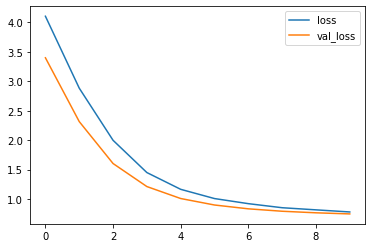

In [ ]:
history_cnn_desnet201_df = pd.DataFrame(history_cnn_desnet201.history)
history_cnn_desnet201_df.loc[:, ['loss', 'val_loss']].plot();